<a href="https://colab.research.google.com/github/vieira-roberto/dev/blob/main/Aula4_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Black'> **Aula 4 - Algoritmo de Clusterização: Kmeans** </font>


**Agrupamento de Clientes baseado nos dados de renda e no volume de gastos:**
A base de dados possui informações sobre as transações dos clientes em um E-commerce.

Fonte: https://www.kaggle.com/shwetabh123/mall-customers

##Dataset de entrada

In [ ]:
## Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importação dos Dados - arquivo com dados dos clientes
df = pd.read_csv('/content/drive/MyDrive/Pós Graduação/Data Science & Statistics/Aula 4/mall_customers.csv')

In [ ]:
#linhas e colunas do dataset
df.shape

(200, 5)

In [ ]:
#5 primeiras linhas do dataset
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Dicionário de Dados

1.   **CustomerID** – código do cliente
2.   **Gender** – Sexo
3.   **Age** – Idade
4.   **Annual Income (k$)** – Renda anual (k = mil)
5.   **Spending Score (1-100)** – Pontuação de gastos (1 gasto baixo, 100 gasto alto)

In [ ]:
df = df.rename(columns={'Annual Income (k$)': 'Income',
                        'Spending Score (1-100)': 'Spending'})

In [ ]:
df.head()

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Estatística Descritiva:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


##Pré-Processamento dos Dados


Importante, verificar se existe dados faltantes, nulos, registros duplicados, etc.

As variáveis devem ser contínuas (numéricas)

In [ ]:
# Checando se há valores faltando
df.isnull().values.any()

False

In [ ]:
# Checando onde há valores faltando
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Income,0
Spending,0


In [ ]:
df.head()

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Separando as dimensões (dimensão é a variável no dataset)
#Annual Income (k$) – Renda anual (k = mil)
#Spending Score (1-100) – Pontuação de gastos (1 gasto baixo, 100 gasto alto)

X = df[['Income', 'Spending' ]].values

In [ ]:
X[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

## Construindo a Máquina Preditiva

### Usaremos o Algoritmo **Kmeans** para criar os grupos de Clientes.

**n_clusters:** número de clusters que queremos gerar com os nossos dados.

**init:** se refere ao modo como o algoritmo será inicializado. k-means++: É o método padrão, e os centroides serão gerados utilizando um método inteligente que favorece a convergência.

**random:** Se refere ao modo de inicialização de forma aleatória, ou seja, os centroides iniciais serão gerados de forma totalmente aleatória sem um critério para seleção.

**ndarray:** array de valores indicando qual seriam os centroides que o algoritmo deveria utilizar para a inicialização .

**max_iter:** Quantidade máxima de vezes que o algoritmo irá executar, por padrão o valor é 300 iterações.

**n_jobs:** Quantos CPU´s iremos utilizar para executar o K-means.

**algorithm:** Versão do algoritmo K-Means a ser utilizada. A versão clássica é executada através do valor full.

Atributos Importantes

**inertia:** Soma das distâncias quadráticas intra cluster.

**labels_:** Rótulos dos Clusters atribuídos.

**cluster_centers_**: Valores dos Centroides.

In [ ]:
#importanto pacote do algoritmo
from sklearn.cluster import KMeans

### Curva/Método de Elbow

O **método Elbow** é uma das formas usadas para descobrir a quantidade ideal de clusters no conjunto de dados.

Como o KMeans calcula a distância das observações até o centro do agrupamento que ela pertence, o ideal é que essa distância seja a menor viável. Matematicamente falando, nós estamos buscando uma quantidade de agrupamentos em que a soma dos quadrados intra-clusters (ou do inglês within-clusters sum-of-squares, comumente abreviado para wcss) seja a menor possível, sendo zero o resultado ótimo.

In [ ]:
# Selecionando o número de clusters através do método Elbow (cotovelo)
#(Soma das distâncias quadráticas intra clusters):
wcss = []
for n in range(1, 11): #verificar para valores de 1 a 10
    algorithm = KMeans(n_clusters=n)
    algorithm.fit(X)
    wcss.append(algorithm.inertia_)


In [ ]:
wcss

[269981.28000000014,
 183257.8615446179,
 106348.37306211119,
 73880.64496247198,
 44454.47647967972,
 37265.86520484345,
 30273.394312070028,
 25388.76002817936,
 23867.91002886003,
 21765.665983292067]

Quanto mais próximos entre si e do centroid, menor a inertia

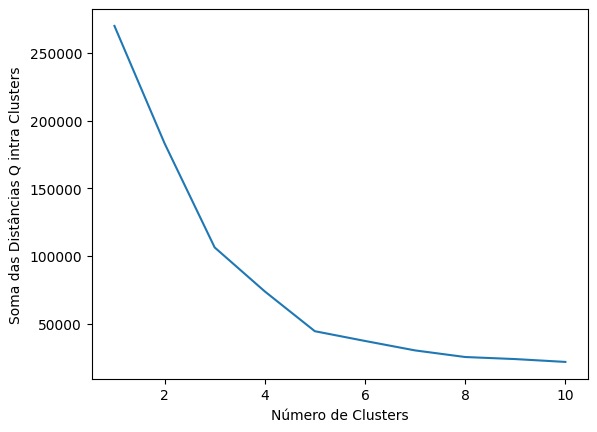

In [ ]:
plt.plot(np.arange(1 , 11) , wcss)
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

Conforme o número de clusters aumenta a soma das distâncias quadráticas intra clusters diminui, quando a diferença entre a distância é quase insignificante temos o valor ótimo de k , no nosso exemplo esse valor seria igual a **5**.

In [ ]:
wcss

[269981.28000000014,
 183257.8615446179,
 106348.37306211119,
 73880.64496247198,
 44454.47647967972,
 37265.86520484345,
 30273.394312070028,
 25388.76002817936,
 23867.91002886003,
 21765.665983292067]

Observando os valores na listagem acima podemos ver claramente que a partir do número de **cinco** clusters não temos uma diminuição tão expressiva.

É sempre bom lembrar que a escolha do parâmetro K é de extrema importância para a tarefa de agrupamento e deve ser corretamente alinhado com as regras do negócio ou problema que esteja resolvendo.

### Escolhendo um Valor de K inicial (igual a 5) para avaliação da Máquina Preditiva

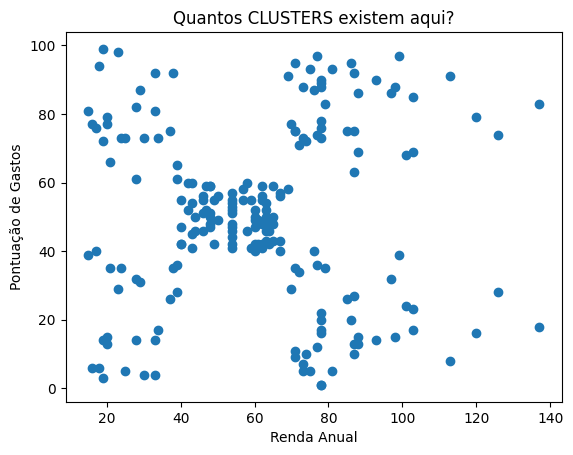

In [ ]:
# Quantos grupos existem nos dados
plt.scatter(x=df['Income'], y=df['Spending'])
plt.xlabel('Renda Anual')
plt.ylabel('Pontuação de Gastos')
plt.title('Quantos CLUSTERS existem aqui?')
plt.show()


In [ ]:
# Criando um modelo com K = 5
# Inicializando e Computando o KMeans com o valor de 5 clusters:
maquina = KMeans(n_clusters=5)

# Cria o modelo de clusterização para agrupar os dados de clientes
maquina.fit(X)

KMeans(n_clusters=5)

Neste momento já temos os dados agrupados e vamos verificar os centroides gerados através do atributo cluster_centers_.

In [ ]:
# Mostra quais são as coordenadas de cada centroid para cada dimensão.
#Temos 2 dimensões e 5 clusters.
maquina.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

In [ ]:
# Mostra a quantidade de clusters
maquina.n_clusters

5

In [ ]:
# Mostra as labels
labels = maquina.labels_
labels

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [ ]:
income = X[:,0]
spending = X[:,1]

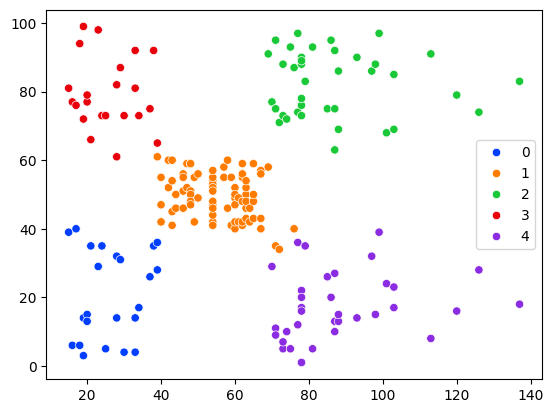

In [ ]:
# Mostra o Gráfico de Clusters
sns.scatterplot(x=income, y=spending, hue=labels, palette='bright')
plt.show()

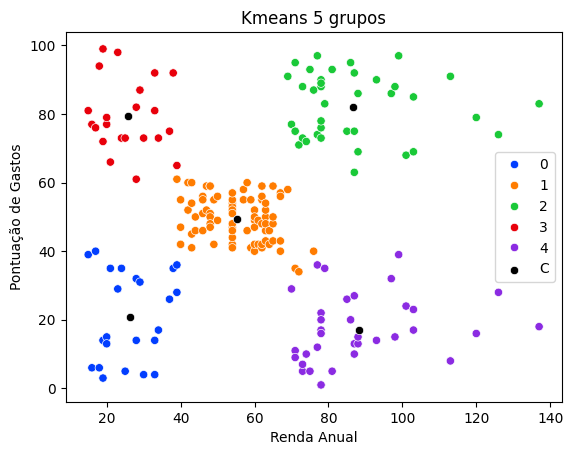

In [ ]:
sns.scatterplot(x=income, y=spending, hue=labels, palette='bright')
sns.scatterplot(x=maquina.cluster_centers_[:, 0], y=maquina.cluster_centers_[:, 1],
                c='black', label='C')
plt.title('Kmeans 5 grupos')
plt.xlabel('Renda Anual')
plt.ylabel('Pontuação de Gastos')
plt.legend()

plt.show()

Solicitamos ao K-means que os dados fossem separados em **5 grupos** e cada grupo têm o seu centroide correspondente (ponto na cor preta).

O centroide é o ponto de partida para cada cluster é a partir dele que todos os outros pontos fazem o cálculo de distância para definir a qual grupo o dado irá pertencer.

### Avaliando a Máquina Preditiva

In [ ]:
#Métrica de avaliação para Clusterização
# The best value is 1 and the worst value is -1
from sklearn.metrics import silhouette_score
?silhouette_score

In [ ]:
# Silhouette Score
silhouette_score(X, labels, metric='euclidean')

0.553931997444648

#### Avaliando a Máquina Preditiva com outros valores de K

In [ ]:
# Criando um modelo com K = 4
modelo_v2 = KMeans(n_clusters=4)
modelo_v2.fit(X)

# Silhouette Score
labels_2 = modelo_v2.labels_
silhouette_score(X, labels_2, metric='euclidean')


0.4937945814354117

In [ ]:
# Criando um modelo com K = 6
modelo_v3 = KMeans(n_clusters=6)
modelo_v3.fit(X)

# Silhouette Score
labels_3 = modelo_v3.labels_
silhouette_score(X, labels_3, metric='euclidean')

0.5428234160403222

In [ ]:
# Criando um modelo com K = 7
modelo_v4 = KMeans(n_clusters=7)
modelo_v4.fit(X)

# Silhouette Score
labels_4 = modelo_v4.labels_
silhouette_score(X, labels_4, metric='euclidean')

0.45723561036659505

### Agrupando novos dados: predict

Com o nosso modelo já criado podemos usar o algoritmo K-means para agrupar novos dados baseado nos centroides que já estão definidos.

Neste caso, o que será feito é o cálculo de distância entre os novos dados e os centroides de nosso modelo, qual centroide apresentar a menor distância, será o cluster escolhido.

In [ ]:
novos_dados = [
       [18, 44],
       [18, 100],
       [20, 4],
       [20, 7],
       [50, 62],
       [77, 91],
       [83, 24]
]
maquina.predict(novos_dados)

array([0, 3, 0, 0, 1, 2, 4], dtype=int32)

##Usando a Marcação dos Clusters da Máquina Preditiva Final

In [ ]:
df.head()

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df['Cluster'] = labels

In [ ]:
df.head()

,CustomerID,Genre,Age,Income,Spending,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.850,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60.560,26.264721,15.0,41.50,61.5,78.00,137.0
Spending,200.0,50.200,25.823522,1.0,34.75,50.0,73.00,99.0
Cluster,200.0,1.825,1.285550,0.0,1.00,1.0,3.00,4.0


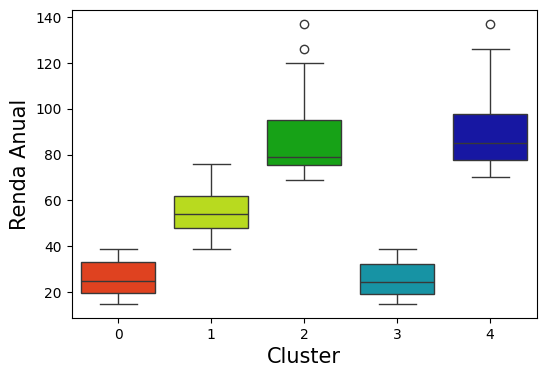

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Cluster', y='Income', data=df, palette="nipy_spectral_r")
plt.xlabel(xlabel="Cluster", fontsize=15)
plt.ylabel(ylabel="Renda Anual",fontsize=15)
plt.show()

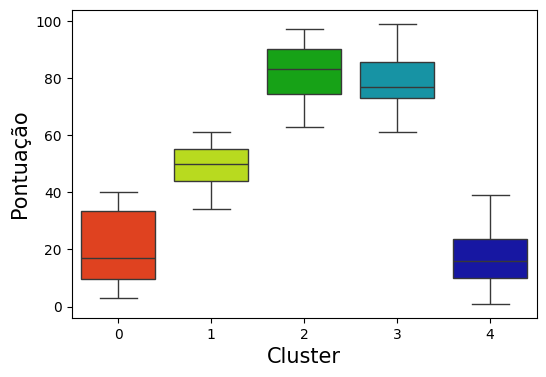

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Cluster', y='Spending', data=df, palette="nipy_spectral_r")
plt.xlabel(xlabel="Cluster", fontsize=15)
plt.ylabel(ylabel="Pontuação",fontsize=15)
plt.show()

In [ ]:
# Calcula a média de Pontuação de Gastos por cluster
df_mean_score = df.groupby('Cluster')['Spending'].mean().reset_index()
df_mean_score

,Cluster,Spending
0,0,20.913043
1,1,49.518519
2,2,82.128205
3,3,79.363636
4,4,17.114286


In [ ]:
# Calcula a média da renda anual por cluster
df_mean_renda = df.groupby('Cluster')['Income'].mean().reset_index()
df_mean_renda

,Cluster,Income
0,0,26.304348
1,1,55.296296
2,2,86.538462
3,3,25.727273
4,4,88.200000


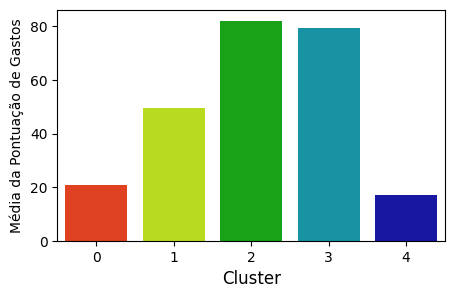

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x='Cluster', y='Spending', data=df_mean_score, palette="nipy_spectral_r")
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Média da Pontuação de Gastos", fontsize=10)
plt.show()

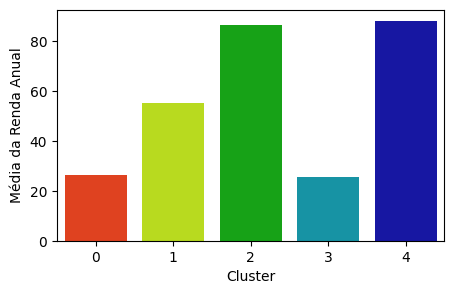

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x='Cluster', y='Income', data=df_mean_renda, palette="nipy_spectral_r")
plt.xlabel("Cluster", fontsize=10)
plt.ylabel("Média da Renda Anual", fontsize=10)
plt.show()

In [ ]:
df.head()

,CustomerID,Genre,Age,Income,Spending,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [ ]:
df.to_csv('novo_dataframe.csv')